In [1]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC


C:\Users\INSA\anaconda4\INSA\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\INSA\anaconda4\INSA\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\INSA\anaconda4\INSA\lib\site-packages\numpy\.libs\libopenblas.wcdjnk7yvmpzq2me2zzhjjrj3jikndb7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import pandas as pd
from sklearn.model_selection import  train_test_split

In [3]:
T = pd.read_csv('base_2021.csv', index_col = 0)
T.head()


,Num_Train,Date,nbre_operation,Id_Agent,Direction_Ligne,Sous_Ligne,Ligne_Presence_imposee,Gare Origine,Heure_Origine,Gare Fin,Heure_Fin,nbre_voy_reconstruc,annee,mois,jour_semaine,periode_pointe,Sens_circulation
0,836404,2021-04-05,1,1.0,DL Paris Grand Est,Paris Est Ã¢ÂÂ Troyes - Mulhouse,1.0,Paris Est,42,Culmont - Chalindrey,40,39.0,2021,4,0,hors pointe,1
1,836404,2021-04-11,7,1.0,DL Paris Grand Est,Paris Est Ã¢ÂÂ Troyes - Mulhouse,1.0,Paris Est,42,Culmont - Chalindrey,40,65.0,2021,4,6,hors pointe,1
2,836404,2021-04-18,7,1.0,DL Paris Grand Est,Paris Est Ã¢ÂÂ Troyes - Mulhouse,1.0,Paris Est,42,Culmont - Chalindrey,40,75.0,2021,4,6,hors pointe,1
3,836404,2021-04-25,14,1.0,DL Paris Grand Est,Paris Est Ã¢ÂÂ Troyes - Mulhouse,1.0,Paris Est,42,Culmont - Chalindrey,40,129.0,2021,4,6,hors pointe,1
7,836406,2021-04-02,2,1.0,DL Paris Grand Est,Paris Est Ã¢ÂÂ Troyes - Mulhouse,1.0,Paris Est,12,Vittel,2,8.0,2021,4,4,pointe midi,1


In [4]:
total = T.drop(['Date', 'Num_Train', 'annee', 'Heure_Fin', 'Gare Origine', 'Gare Fin','Direction_Ligne'
                      , 'Ligne_Presence_imposee', 'Sens_circulation','Heure_Origine','periode_pointe','mois'] , axis = 1)

total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38660 entries, 0 to 39026
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nbre_operation       38660 non-null  int64  
 1   Id_Agent             38660 non-null  float64
 2   Sous_Ligne           38660 non-null  object 
 3   nbre_voy_reconstruc  38660 non-null  float64
 4   jour_semaine         38660 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 1.8+ MB


In [5]:
total['jour_semaine'] = total['jour_semaine'].astype('object')

total['Id_Agent'] = total['Id_Agent'].astype('object')


In [6]:
import numpy as np
import pandas as pd

from sklearn import model_selection, preprocessing

from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

In [7]:
t = pd.DataFrame(total) 
for _c in t.select_dtypes(include=['object']).columns:
    print(_c)
    t[_c]  = pd.Categorical(t[_c])
    T1 = pd.get_dummies(t)
T1



Id_Agent
Sous_Ligne
jour_semaine


,nbre_operation,nbre_voy_reconstruc,Id_Agent_1.0,Id_Agent_2.0,Id_Agent_3.0,Id_Agent_4.0,Id_Agent_5.0,Id_Agent_6.0,Id_Agent_7.0,Id_Agent_8.0,...,Sous_Ligne_Thionville â Longuyon â Longwy,Sous_Ligne_Tram-train Thann Ã¢ÂÂ Mulhouse,Sous_Ligne_Wissembourg Ã¢ÂÂ Strasbourg,jour_semaine_0,jour_semaine_1,jour_semaine_2,jour_semaine_3,jour_semaine_4,jour_semaine_5,jour_semaine_6
0,1,39.0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,7,65.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,7,75.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,14,129.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,2,8.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39022,12,45.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
39023,14,19.0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
39024,11,45.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
39025,6,43.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
#Normalisation de l'ensemble des données avec preprocesssing.StandardScaler
T1[T1.columns] = pd.DataFrame(preprocessing.RobustScaler().fit_transform(T1))
y = T1['nbre_operation']
X = T1.drop(['nbre_operation'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 789)


In [10]:
X_train.isna().sum()

nbre_voy_reconstruc    295
Id_Agent_1.0           295
Id_Agent_2.0           295
Id_Agent_3.0           295
Id_Agent_4.0           295
                      ... 
jour_semaine_2         295
jour_semaine_3         295
jour_semaine_4         295
jour_semaine_5         295
jour_semaine_6         295
Length: 79, dtype: int64

In [11]:
X_train = X_train.dropna()
y_train = y_train.dropna()

In [12]:
X_train.shape

(30633, 79)

# REG POLY

In [13]:
X_test = X_test.dropna()
y_test = y_test.dropna()


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

#scaler = preprocessing.StandardScaler().fi
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [ 2.70040326e-01 -4.42094432e+11 -4.42094432e+11 -4.42094432e+11
 -4.42094432e+11 -4.42094432e+11 -4.42094432e+11 -4.42094432e+11
 -4.42094432e+11 -4.42094432e+11 -4.42094432e+11 -4.42094432e+11
 -5.74915468e+11 -5.74915468e+11 -5.74915468e+11 -5.74915468e+11
 -5.74915468e+11 -5.74915468e+11 -5.74915468e+11 -5.74915468e+11
 -5.74915468e+11 -5.74915468e+11 -5.74915468e+11 -5.74915468e+11
 -5.74915468e+11 -5.74915468e+11 -5.74915468e+11 -5.74915468e+11
 -5.74915468e+11 -5.74915468e+11 -5.74915468e+11 -5.74915468e+11
 -5.74915468e+11 -5.74915468e+11 -5.74915468e+11 -5.74915468e+11
 -5.74915468e+11 -5.74915468e+11 -5.74915468e+11 -5.74915468e+11
 -5.74915468e+11 -5.74915468e+11 -5.74915468e+11 -5.74915468e+11
 -5.74915468e+11 -5.74915468e+11 -5.74915468e+11 -5.74915468e+11
 -5.74915468e+11 -5.74915468e+11 -5.74915468e+11 -5.74915468e+11
 -5.74915468e+11 -5.74915468e+11 -5.74915468e+11 -5.74915468e+11
 -5.74915468e+11 -5.74915468e+11 -5.74915468e+11 -5.74915468e+11
 

# KNN INTERACTIVE

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from ipywidgets import interact
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split, cross_validate

X,y=make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=5.6, random_state=42)

@interact # scaling
def knn_interactive(k=(1,21,2), weight=["distance", "uniform"], p=(1.,2.5,0.5)):
    model=KNeighborsClassifier(n_neighbors=k, weights=weight, p=p)
    scaler=StandardScaler()
    Xsc=scaler.fit_transform(X) # (x-x.mean())/x.std()
    cv = cross_validate(model, Xsc, y, cv=10, return_train_score=True)
    cv_f=pd.DataFrame({"train":cv["train_score"], "test":cv["test_score"]})
    to_be_displayed=cv_f.agg(["mean","std"]).T
    display(to_be_displayed)

interactive(children=(IntSlider(value=11, description='k', max=21, min=1, step=2), Dropdown(description='weigh…

# KNN REGRESSOR

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error as score

clf = KNeighborsRegressor(n_neighbors=9)
clf = clf.fit(X, y)

In [18]:
score(clf.predict(X), y)

0.11555555555555558

In [19]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=sum(list(map(ord, 'shad'))))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=126)
clf = clf.fit(X_train, y_train)
score(clf.predict(X_test), y_test)


0.15432098765432098

In [20]:
def get_scores(X_train, X_test, y_train, y_test, max_k=100, clf_class=KNeighborsRegressor):
    for k in range(1, max_k):
        yield score(y_test, clf_class(n_neighbors=k).fit(X_train, y_train).predict(X_test))

scores = list(get_scores(X_train, X_test, y_train, y_test))

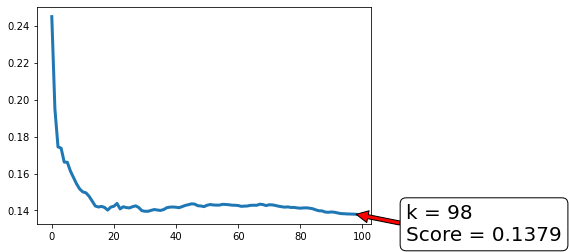

In [21]:
best_k = min(range(len(scores)), key=scores.__getitem__)
start_point = best_k, scores[best_k]
plt.annotate("k = {}\nScore = {:.4}".format(best_k, scores[best_k]),
            xy=start_point,
            xytext=(50, -10), textcoords='offset points',
            size=20,
            bbox=dict(boxstyle="round", fc="1"),
            va="center", ha="left",
            arrowprops=dict(facecolor='red', width=4,))
plt.plot(scores, linewidth=3.0);

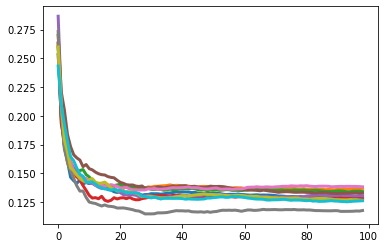

In [22]:
for idx in range(10):
    parts = train_test_split(X, y, test_size=0.3, random_state=idx)
    current_scores = list(get_scores(*parts))
    plt.plot(current_scores, linewidth=3.0);

In [23]:
def get_scores(X_train, X_test, y_train, y_test, max_k=100, clf_class=KNeighborsRegressor):
    for k in range(1, max_k):
        yield score(y_test, clf_class(n_neighbors=k).fit(X_train, y_train).predict(X_test))

scores = list(get_scores(X_train, X_test, y_train, y_test))

In [24]:
print(scores)

[0.245, 0.195, 0.17444444444444443, 0.17375, 0.16620000000000001, 0.1661111111111111, 0.1613265306122449, 0.1578125, 0.15432098765432098, 0.1516, 0.15004132231404957, 0.14954861111111112, 0.14769230769230768, 0.14510204081632655, 0.14242222222222226, 0.141875, 0.14219723183391003, 0.14162037037037037, 0.14018005540166203, 0.1418375, 0.14227891156462585, 0.143801652892562, 0.1408506616257089, 0.1419965277777778, 0.141568, 0.14136834319526628, 0.1420301783264746, 0.1425127551020408, 0.1415933412604043, 0.13988333333333333, 0.1395681581685744, 0.13955078125, 0.1400550964187328, 0.1405060553633218, 0.1402204081632653, 0.14001543209876544, 0.14047479912344776, 0.14146814404432134, 0.14180144641683104, 0.14186875000000002, 0.14174301011302798, 0.14149659863945577, 0.14211465657111952, 0.14274276859504134, 0.14311851851851853, 0.14360113421550094, 0.14344273426889995, 0.1425737847222222, 0.14243023740108288, 0.14208, 0.14281814686658978, 0.14321745562130178, 0.14297792808828766, 0.14288408779

La meilleure façon de saisir l'intuition derrière les 
divisions bloquées et chronologiques est de les visualiser.
Les trois méthodes de division sont décrites dans le diagramme ci-dessous. 
L'axe horizontal est la taille de l'ensemble d'apprentissage tandis que
l'axe vertical représente les itérations de validation croisée. 
Les plis utilisés pour la formation sont représentés en bleu et 
les plis utilisés pour la validation sont représentés en orange.
Vous pouvez intuitivement interpréter l'axe horizontal comme une ligne de progression dans le temps puisque
nous n'avons pas mélangé l'ensemble de données et maintenu l'ordre chronologique.

Timeseries cross validation: #Une version plus sophistiquée des ensembles d'entraînement/de test est
    la validation croisée des séries chronologiques.
    #Dans cette procédure, il existe une série d'ensembles de tests, chacun consistant en une seule observation.

#L'ensemble d'apprentissage correspondant se compose uniquement d'observations
qui se sont produites avant #l'observation qui forme l'ensemble de test. Ainsi
, aucune observation future ne peut être utilisée dans la construction #de la prévision.

Puisqu'il n'est pas possible d'obtenir une prévision fiable basée sur un petit ensemble d'apprentissage, #les premières observations ne sont pas considérées comme des ensembles de test.

LR: 0.294969 (0.138992)
LDA: 0.289623 (0.156791)
KNN: 0.188570 (0.151087)


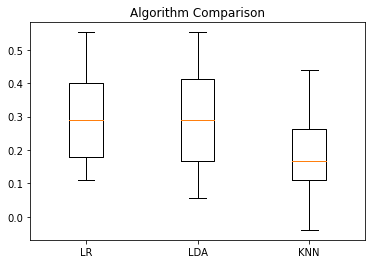

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
#X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.20, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=126)
models = []
models.append(('LR', LogisticRegression(solver="liblinear", multi_class="ovr")))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
    tscv = TimeSeriesSplit(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

# XGBOOST

In [26]:

from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=50)
xgb=XGBClassifier(colsample_bytree=0.8, learning_rate=0.4, max_depth=4)
xgb.fit(X,y)
pred=xgb.predict(X_test)
print('Accuracy=  ',accuracy_score(y_test,pred))


C:\Users\INSA\anaconda4\INSA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:54:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy=   0.904


In [27]:
#Cross validating (for classification) the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
xgb=XGBClassifier(colsample_bytree=0.8, learning_rate=0.4, max_depth=4)
cvs=cross_val_score(xgb,X,y,scoring='accuracy',cv=10)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(xgb,X,y,cv=10)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

#Cross validating(for regression) the model and checking the cross_val_score,model giving highest score will be choosen as final model
gbm=GradientBoostingRegressor(max_depth=7,min_samples_leaf=1,n_estimators=100)
cvs=cross_val_score(xgb,X,y,scoring='r2',cv=5)
print('cross_val_scores=  ',cvs.mean())


C:\Users\INSA\anaconda4\INSA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:54:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:54:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:54:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:54:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\INSA\anaconda4\INSA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:54:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:54:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:54:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:54:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\INSA\anaconda4\INSA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\INSA\anaconda4\INSA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:54:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:54:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\INSA\anaconda4\INSA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\INSA\anaconda4\INSA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:54:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\INSA\anaconda4\INSA\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:54:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:54:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
cross_val_scores=   0.10800000000000001


# Évaluation du modèle de classification par knn classifier

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7, metric='minkowski')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,0,1
Classe réelle,,
0,91,23
1,28,108


In [29]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)


In [30]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

In [31]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       114
           1       0.83      0.78      0.80       136

    accuracy                           0.79       250
   macro avg       0.79      0.79      0.79       250
weighted avg       0.79      0.79      0.79       250



In [32]:
print(confusion_matrix(y_test, predictions))

[[ 92  22]
 [ 30 106]]


# Choosing An Optimal K Value Using the Elbow Method

In [33]:
error_rates = []

In [34]:
for i in np.arange(1, 101):

    new_model = KNeighborsClassifier(n_neighbors = i)

    new_model.fit(X_train, y_train)

    new_predictions = new_model.predict(X_test)

    error_rates.append(np.mean(new_predictions != y_test))

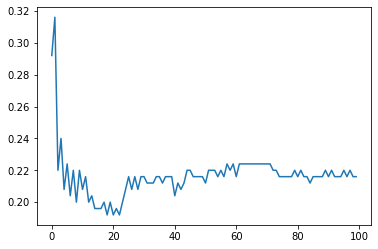

In [35]:
plt.plot(error_rates)
#Comme vous pouvez le voir, nos taux d'erreur ( avoisinent 0.18) ont tendance à être minimisés avec une valeur K d'environ 20.
#Cela signifie que 21 est un choix approprié pour K qui équilibre à la fois la simplicité et le pouvoir prédictif.

# Création du nouveau classificateur et entraînement du modèle

In [36]:
#Création du nouveau classificateur et entraînement du modèle
knn_m = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_m.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan')

In [37]:
#Score du modèle utilisant la distance de Minkowski
score_minkowski = knn.score(X_test, y_test)

#Score du modèle utilisant la distance de Manhattan
score_manhattan = knn_m.score(X_test, y_test)

score_minkowski, score_manhattan

(0.796, 0.792)

In [38]:
score_minko = []
score_man = []
score_cheb = []

for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score_minko.append(knn.score(X_test, y_test))

for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(X_train, y_train)
    score_man.append(knn.score(X_test, y_test))
    
for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    knn.fit(X_train, y_train)
    score_cheb.append(knn.score(X_test, y_test))

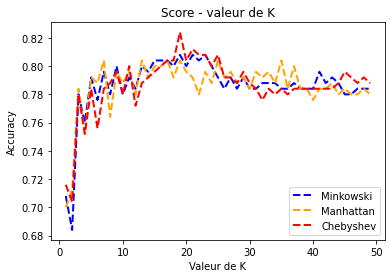

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1, 50), score_minko, color='blue', linestyle='dashed', lw=2, label='Minkowski')
plt.plot(range(1, 50), score_man, color='orange', linestyle='dashed', lw=2, label='Manhattan')
plt.plot(range(1, 50), score_cheb, color='red', linestyle='dashed', lw=2, label='Chebyshev')
plt.title('Score - valeur de K')  
plt.xlabel('Valeur de K')  
plt.ylabel('Accuracy') 
plt.legend();

In [40]:
#Création du nouveau classificateur et entraînement du modèle
knn_m = KNeighborsClassifier(n_neighbors=33, metric='manhattan')
knn_m.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=33)

In [41]:
#Score du modèle utilisant la distance de Minkowski
score_minkowski = knn.score(X_test, y_test)

#Score du modèle utilisant la distance de Manhattan
score_manhattan = knn_m.score(X_test, y_test)
score_minkowski, score_manhattan


(0.788, 0.796)

In [43]:
#Création du nouveau classificateur et entraînement du modèle
knn_m = KNeighborsClassifier(n_neighbors=45, metric='manhattan')
knn_m.fit(X_train, y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=45)

In [44]:
#Score du modèle utilisant la distance de Minkowski
score_minkowski = knn.score(X_test, y_test)

#Score du modèle utilisant la distance de Manhattan
score_manhattan = knn_m.score(X_test, y_test)
score_minkowski, score_manhattan


(0.788, 0.784)

### KNN 3 D

In [54]:
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.preprocessing import MinMaxScaler # for feature scaling
from sklearn.preprocessing import OrdinalEncoder # to encode categorical variables
from sklearn.neighbors import KNeighborsClassifier # for KNN classification
from sklearn.neighbors import KNeighborsRegressor # for KNN regression

import matplotlib.pyplot as plt # for data visualization
import plotly.express as px # for data visualization

In [ ]:
# Create a 3D scatter plot
fig = px.scatter_3d(total, x=total['Id_Agent'], y=total['nbre_voy_reconstruc'], z=total['jour_semaine'],

                    color=total['Id_Agent'],
                    color_discrete_sequence=['#636EFA','#EF553B','#00CC96'], 
                    hover_data=[ 'nbre_operation'],
                    height=900, width=900
                   )

# Update chart looks
fig.update_layout(#title_text="Scatter 3D Plot",
                  showlegend=True,
                  legend=dict(orientation="h", yanchor="top", y=1, xanchor="center", x=0.5),
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.2),
                                        eye=dict(x=-1.5, y=1.5, z=0.5)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          dtick=0.01,
                                         ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          dtick=0.01,
                                          ),
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          dtick=5
                                         )))

# Update marker size
fig.update_traces(marker=dict(size=2))

plt.show()